 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [63]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [64]:
pwd

'C:\\Users\\ThinkPad\\UofT Bootcamp'

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [65]:
# Reading whale returns
# Use the pathlib library to set the Path
whale_returns_csv = Path("whale_returns.csv")

In [66]:
# Read CSV and set the header
whale_returns = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [67]:
# Use the `dtypes` attribute to list the column data types
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [68]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [69]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [70]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [71]:
# Reading algorithmic returns
# Use the pathlib library to set the Path
algo_returns_csv = Path("algo_returns.csv")

In [72]:
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [73]:
# Use the `dtypes` attribute to list the column data types
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [74]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [75]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [76]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [78]:
# Reading S&P TSX 60 Closing Prices
# Use the pathlib library to set the Path
sp_tsx_history_csv = Path("sp_tsx_history.csv")

In [79]:
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [81]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [82]:
# Fix Data Types

sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','')
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',','')

# another option: %timeit df.state_bottle_retail.apply(lambda x: x.replace('$',''))
# The above code is an option as a solution

sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')

sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [83]:
# Calculate Daily Returns
# The `pct_change` function easily calculates daily returns for a DataFrame
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [84]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace=True)

In [85]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [86]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns = {'Close':'SP_TSX'}, inplace = True)

In [87]:
sp_tsx_daily_returns.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [88]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns, algo_returns, sp_tsx_daily_returns], axis="columns", join="inner")

In [89]:
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

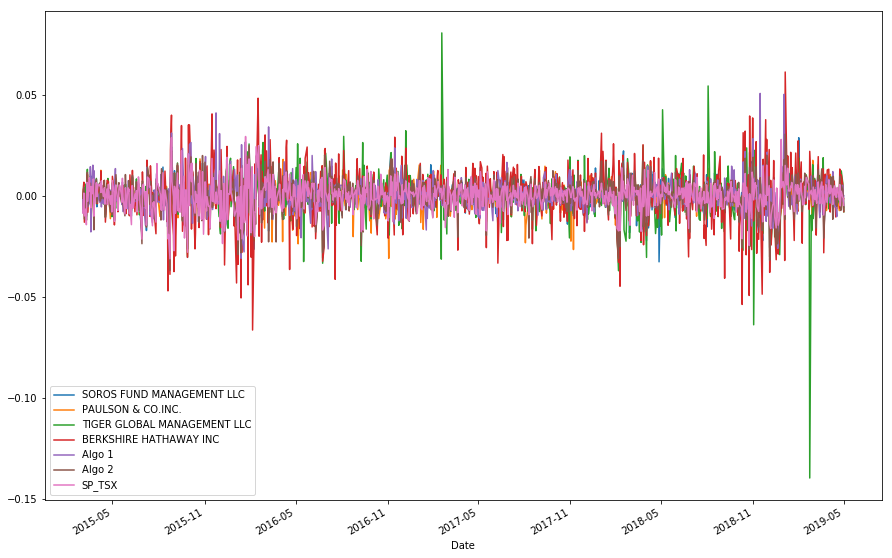

In [96]:
# Plot daily returns of all portfolio
combined_returns_df.plot(figsize = (15,10))

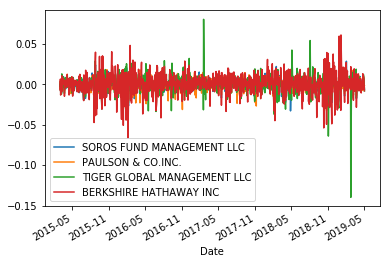

In [97]:
whale_returns.plot()

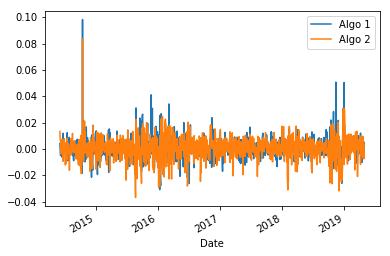

In [98]:
algo_returns.plot()

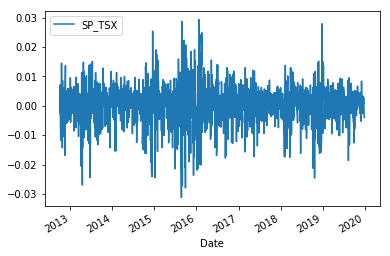

In [99]:
sp_tsx_daily_returns.plot()

#### Calculate and Plot cumulative returns.

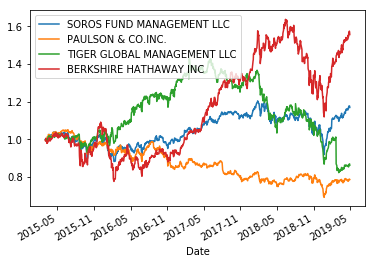

In [100]:
# Calculate cumulative returns of all portfolios
# The `cum_prod` function cumulatively multiplies each preceding number by the next until the end of the series of data points
whale_returns_cumulative_returns = (1 + whale_returns).cumprod()
whale_returns_cumulative_returns.plot()

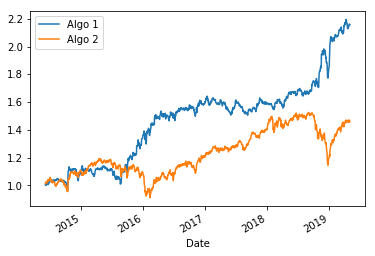

In [102]:
# Calculate cumulative returns of all portfolios
# The `cum_prod` function cumulatively multiplies each preceding number by the next until the end of the series of data points
algo_returns_cumulative_returns = (1 + algo_returns).cumprod()
algo_returns_cumulative_returns.plot()

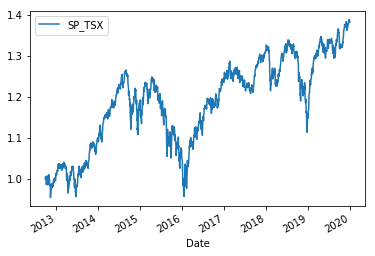

In [109]:
# Calculate cumulative returns of all portfolios
# The `cum_prod` function cumulatively multiplies each preceding number by the next until the end of the series of data points
sp_tsx_daily_returns_cumulative_returns = (1 + sp_tsx_returns).cumprod()
sp_tsx_daily_returns_cumulative_returns.plot()

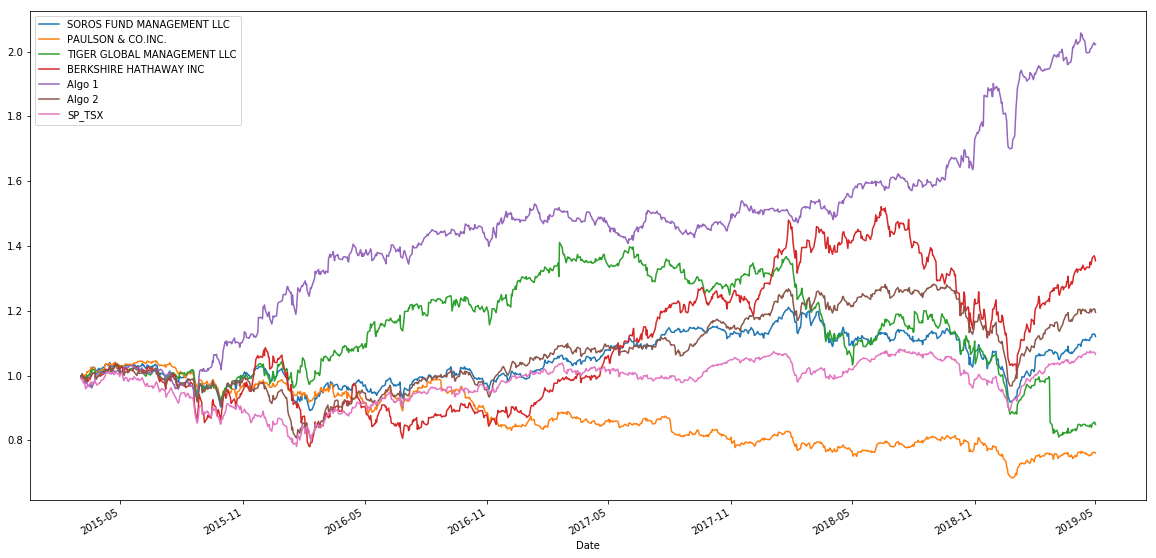

In [110]:
# Calculate cumulative returns of all portfolios
# The `cum_prod` function cumulatively multiplies each preceding number by the next until the end of the series of data points
combined_returns_df_cumulative_returns = (1 + combined_returns_df).cumprod()
combined_returns_df_cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


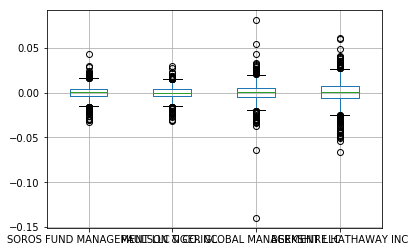

In [111]:
# Box plot to visually show risk
whale_returns.boxplot()

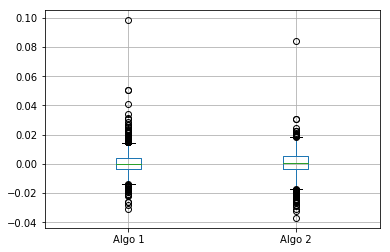

In [112]:
algo_returns.boxplot()

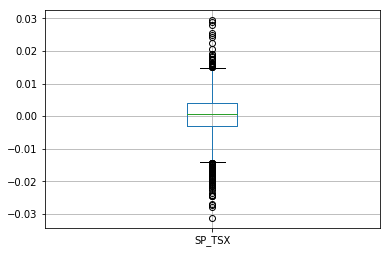

In [113]:
sp_tsx_daily_returns.boxplot()

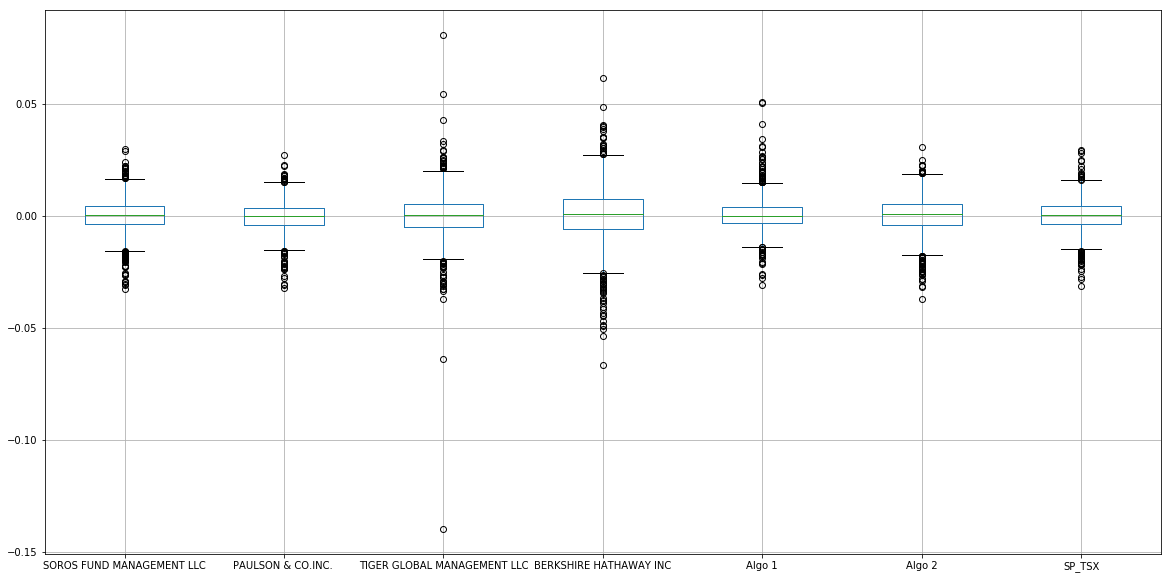

In [115]:
combined_returns_df.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [116]:
# Calculate the daily standard deviations of all portfolios

# # Daily Standard Deviations
# example: sp500_daily_std = sp500_daily_returns.std()

whale_returns_std = whale_returns.std()
whale_returns_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [117]:
algo_returns_std = algo_returns.std()
algo_returns_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [118]:
sp_tsx_daily_returns_std = sp_tsx_daily_returns.std()
sp_tsx_daily_returns_std

SP_TSX    0.006637
dtype: float64

In [120]:
combined_returns_df_std = pd.DataFrame(combined_returns_df.std()).rename(columns = {0:"STD"})
combined_returns_df_std

,STD
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP_TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [122]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

higher_std = combined_returns_df_std[combined_returns_df_std["STD"] > combined_returns_df_std.loc["SP_TSX", "STD"]]
higher_std

,STD
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


In [125]:
f"Soros Fund Management LLC, Tiger Global Management LLC, Berkshire Hathaway INC, Algo 1 and Algo 2 are all riskier than the S&P TSX 60"

'Soros Fund Management LLC, Tiger Global Management LLC, Berkshire Hathaway INC, Algo 1 and Algo 2 are all riskier than the S&P TSX 60'

### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized standard deviation (252 trading days)

# # Example:
# sp500_annualized_std = sp500_daily_std * np.sqrt(252)

In [132]:
whale_annualized_std = whale_df_std * np.sqrt(252)
whale_annualized_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [133]:
algo_annualized_std = algo_df_std * np.sqrt(252)
algo_annualized_std

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [134]:
sp_tsx_daily_returns_annualized_std = sp_tsx_returns_std * np.sqrt(252)
sp_tsx_daily_returns_annualized_std

SP_TSX    0.105365
dtype: float64

In [135]:
combined_returns_df_annualized_std = combined_returns_df_std * np.sqrt(252)
combined_returns_df_annualized_std 

,STD
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP_TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

# # Example: Calculate the rolling 180-day rolling standard deviation
# sp500_df.rolling(window=180).std().plot()

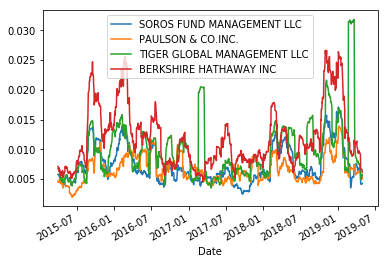

In [136]:
whale_returns.rolling(window=21).std().plot()

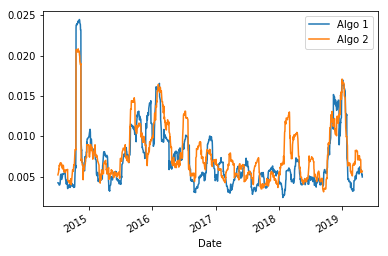

In [137]:
algo_returns.rolling(window=21).std().plot()

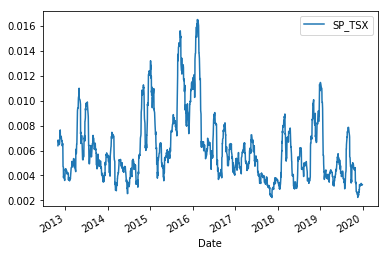

In [138]:
sp_tsx_daily_returns.rolling(window=21).std().plot()

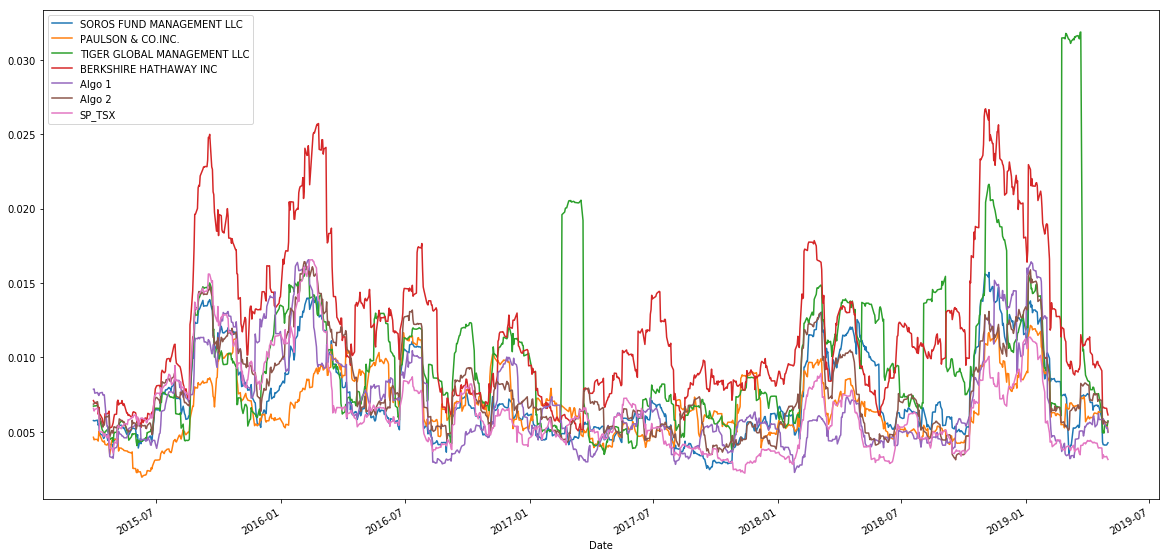

In [140]:
combined_returns_df.rolling(window=21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

In [142]:
# Calculate the correlation
# Use the `corr` function to calculate correlations
# correlation = combined_df.corr()
correlation_sp_tsx_daily_returns = pd.DataFrame(combined_returns_df.corr()).loc[:,"SP_TSX"]
correlation_sp_tsx_daily_returns

SOROS FUND MANAGEMENT LLC      0.673930
PAULSON & CO.INC.              0.486511
TIGER GLOBAL MANAGEMENT LLC    0.440583
BERKSHIRE HATHAWAY INC         0.557250
Algo 1                         0.310276
Algo 2                         0.737370
SP_TSX                         1.000000
Name: SP_TSX, dtype: float64

In [143]:
correlation_sp_tsx_daily_returns[correlation_sp_tsx_daily_returns==correlation_sp_tsx_daily_returns[correlation_sp_tsx_daily_returns<1].max()]

Algo 2    0.73737
Name: SP_TSX, dtype: float64

In [144]:
f"Algo 2 best mimics the S&P TSX 60."

'Algo 2 best mimics the S&P TSX 60, which we can also see in the heatmap below'

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

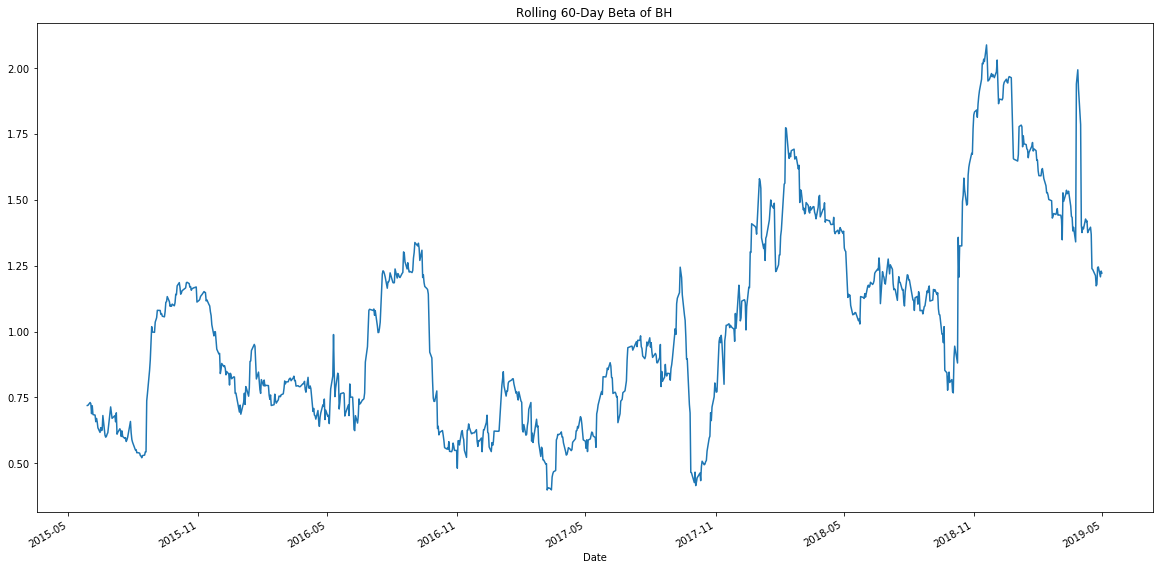

In [147]:
# Calculate covariance of a single portfolio

#### covariance = combined_daily_returns['AMD'].cov(combined_daily_returns['SP500'])
#### covariance
# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend

rolling_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_df['SP_TSX'])
rolling_variance = combined_returns_df['SP_TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

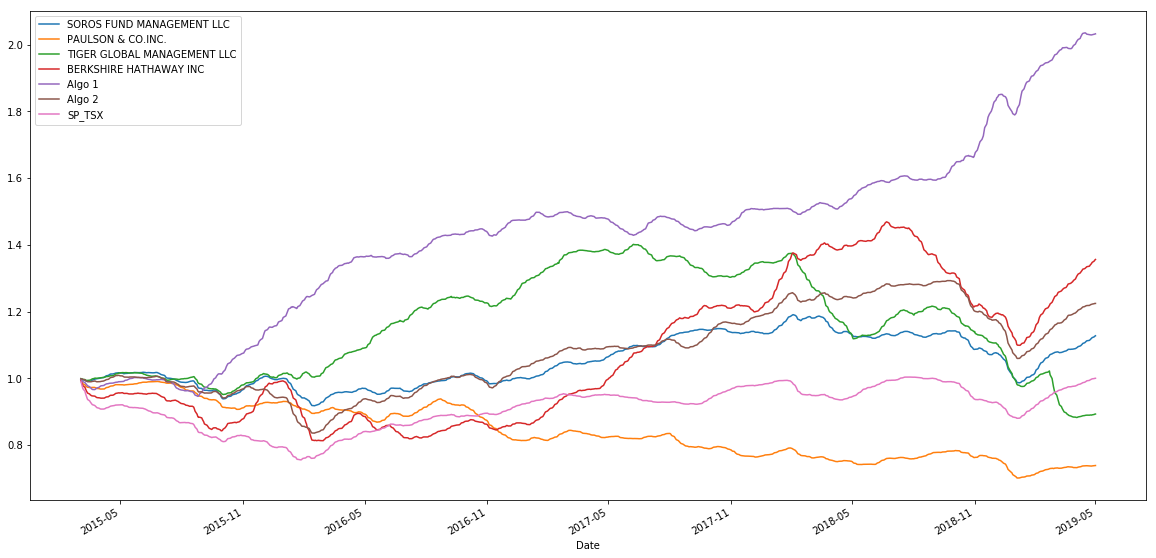

In [149]:
# Use `ewm` to calculate the rolling window
combined_returns_df_ewm = combined_returns_df.ewm(span = 21,adjust = False).mean()
(1+combined_returns_df_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [150]:
# Annualized Sharpe Ratios


# # Calculate the annualized sharpe ratio
# sp500_sharpe_ratio = (
#     sp500_daily_returns.mean() * 252 / (sp500_daily_returns.std() * np.sqrt(252))

# sp500_sharpe_ratio
sharpe_ratios = combined_returns_df.mean()*252/(combined_returns_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX                         0.195550
dtype: float64

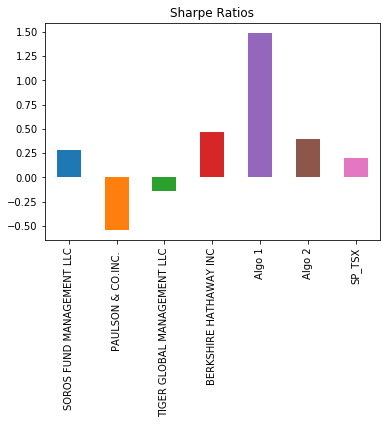

In [151]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [155]:
f"Algo 1 and Algo 2 both outpeformed the market. However, only Algo 1 outpeformed the entire whales portfolio. Algo 2 outperfomed all of the whales portfolios except for Berkshire Hathaway INC."

'Algo 1 and Algo 2 both outpeformed the market. However, only Algo 1 outpeformed the entire whales portfolio. Algo 2 outperfomed all of the whales portfolios except for Berkshire Hathaway INC.'

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [169]:
# Read the first stock
shop_historical = pd.read_csv(Path("shop_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
shop_historical.rename(columns = {"Close":"Shop"}, inplace = True)
shop_historical = shop_historical.drop(columns=["Symbol"])
shop_historical.head()

,Shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [173]:
# Reading data from 2nd stock
otex_historical = pd.read_csv(Path("otex_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
otex_historical.rename(columns = {"Close":"Otex"}, inplace = True)
otex_historical = otex_historical.drop(columns=["Symbol"])
otex_historical.head()

,Otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [174]:
# Reading data from 3rd stock
l_historical = pd.read_csv(Path("l_historical.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
l_historical.rename(columns = {"Close":"l"}, inplace = True)
l_historical = l_historical.drop(columns=["Symbol"])
l_historical.head()

,l
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [175]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat((shop_historical, otex_historical, l_historical), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

##### Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#######combined_returns_df = pd.concat([whale_df, algo_df, sp_tsx_returns], axis="columns", join="inner")

,Shop,Otex,l
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [177]:
# Reset Date index
# Already done
my_stocks.index = my_stocks.index.normalize()
my_stocks.head()

,Shop,Otex,l
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [165]:
# Reorganize portfolio data by having a column per symbol
# Already done

In [178]:
# Calculate daily returns
my_stocks_returns = my_stocks.pct_change()
# Drop NAs
my_stocks_returns.dropna(inplace=True)
# Display sample data
my_stocks_returns.head()

,Shop,Otex,l
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [179]:
# Set weights
# weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
2018-01-09   -0.004570
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [182]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,combined_returns_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [183]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2018-01-03,0.008561,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.009167,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.002271,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.005395,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.004570,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
##### # Daily Standard Deviations
##### sp500_daily_std = sp500_daily_returns.std()
##### sp500_daily_std.head()

In [ ]:
###### Calculate the annualized standard deviation (252 trading days)
####### sp500_annualized_std = sp500_daily_std * np.sqrt(252)
###### sp500_annualized_std.head()

In [184]:
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.021782
SOROS FUND MANAGEMENT LLC,0.009177
PAULSON & CO.INC.,0.007203
TIGER GLOBAL MANAGEMENT LLC,0.013848
BERKSHIRE HATHAWAY INC,0.014328
Algo 1,0.007561
Algo 2,0.008672
SP_TSX,0.006244


In [186]:
portfolio_annualized_std = portfolio_std * np.sqrt(252)
portfolio_annualized_std

,std
my_portfolio,0.345776
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
SP_TSX,0.099121


In [187]:
f"My porftolio is the riskiest."

'My porftolio is the riskiest.'

### Calculate and plot rolling `std` with 21-day window

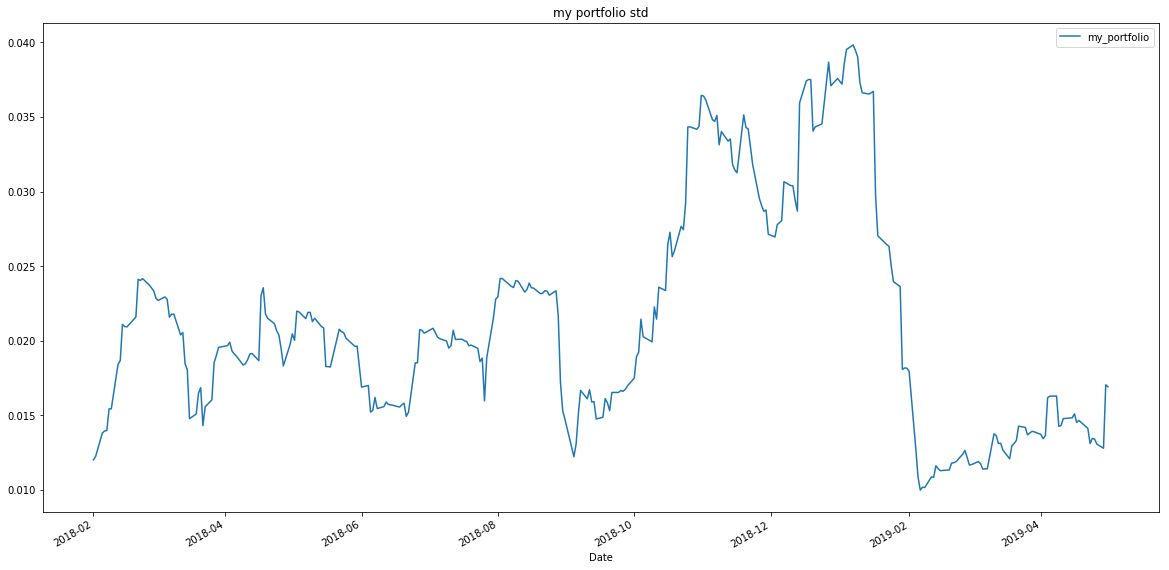

In [189]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

my_portfolio_rolling_21 = portfolio_returns[["my_portfolio"]].rolling(window = 21).std()
my_portfolio_rolling_21.plot(figsize = (20,10), title = 'my portfolio std')

### Calculate and plot the correlation

In [193]:
# Calculate and plot the correlation
correlation_my_portfolio = portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.650858
Name: my_portfolio, dtype: float64

In [194]:
f"My portfolio is correlated with Berkshire Hathaway INC."

'My portfolio is correlated with Berkshire Hathaway INC.'

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

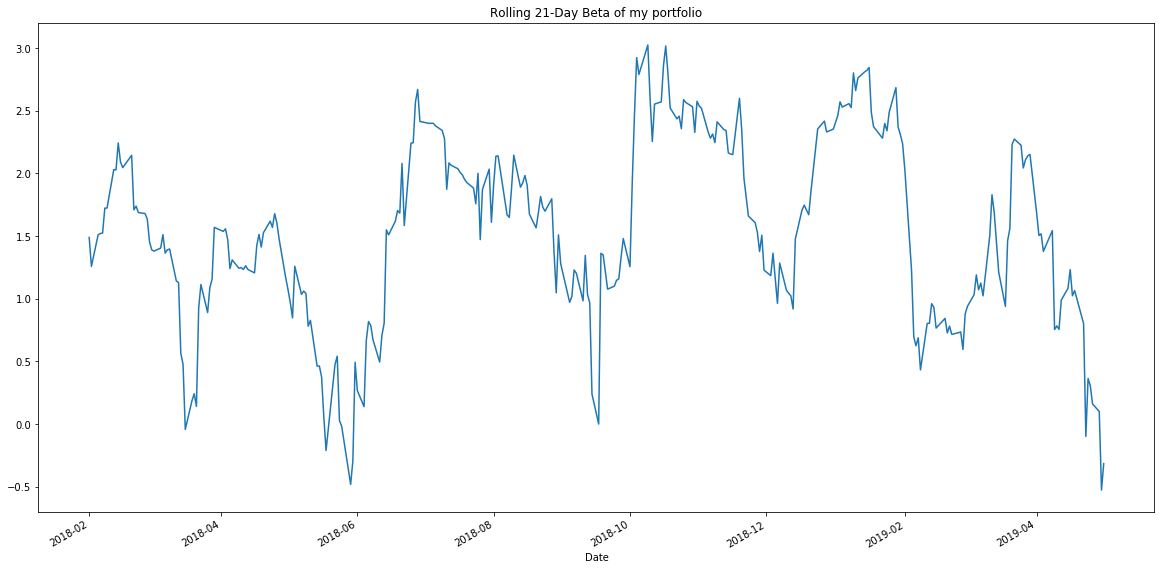

In [195]:
# Calculate and plot Beta

rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=21).cov(portfolio_returns['SP_TSX'])
rolling_variance = portfolio_returns['SP_TSX'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Calculate Annualzied Sharpe Ratios

trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

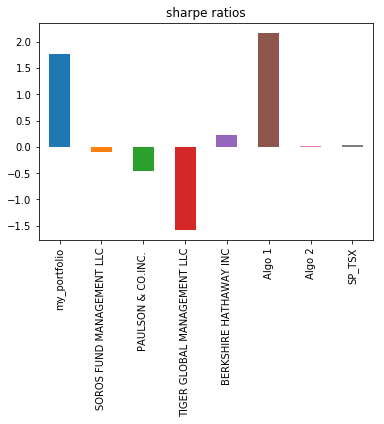

In [198]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [200]:
f"My portfolio is doing faily well, outperforming all other portfolios except for Algo 1."

'My portfolio is doing faily well, outperforming all other portfolios except for Algo 1.'